# Script 2. Exploracion

## Parte 0. Mount

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
### 1. Dataframe y archivo para analisis descriptivo crudo
base_cruda_2022_2024 = pd.read_csv('/content/gdrive/MyDrive/SIMA/FINAL/base_cruda_2022_2024.csv')

### 2. Dataframe y archivo para analisis descriptivo procesado, desarrollo supuestos estadisticos (Exploracion de datos nulos y outliers)
base_cocinada_2022_2024 = pd.read_csv('/content/gdrive/MyDrive/SIMA/FINAL/base_cocinada_2022_2024.csv')

### 3. Dataframe y archivo para analisis descriptivo procesado, desarrollo supuestos estadisticos (Histogramas y estadistica general)
df_Completo_Imputado_Todascolumnas_SinEstandarizar_2022_2024 = pd.read_csv('/content/gdrive/MyDrive/SIMA/FINAL/df_Completo_Imputado_Todascolumnas_SinEstandarizar_2022_2024.csv')

### 4. Dataframe y archivo para analisis descriptivo procesado + estandarizacion, desarrollo supuestos estadisticos (Histogramas y estadistica general)
df_completo_estandarizado_2022_2024 = pd.read_csv('/content/gdrive/MyDrive/SIMA/FINAL/df_completo_estandarizado_2022_2024.csv')

### 5. Dataframe y archivo para clusterización
df_completo_estandarizado_2022_2024 = pd.read_csv('/content/gdrive/MyDrive/SIMA/FINAL/df_completo_estandarizado_2022_2024.csv')

### 6. Dataframe y archivo para interpolacion y mapa
df_completo_estandarizado_2022_2024 = pd.read_csv('/content/gdrive/MyDrive/SIMA/FINAL/df_completo_estandarizado_2022_2024.csv')

## 7. Ubicaciones y datos de estaciones
df_UBI = pd.read_csv('/content/gdrive/MyDrive/SIMA/BASES_DE_DATOS/PROCESADO/UBICACIONES/UBI.csv')

## Parte 1. Analisis estructura

Para dataset sin modificar

Dimension dataset  (2020-2024)

In [ ]:
import pandas as pd
# Obtener la dimensión del dataset
dim_dataset = base_cruda_2022_2024.shape
print("Cantidad de registros:", dim_dataset[0])
print("Cantidad de columnas:", dim_dataset[1])


Cantidad de registros: 413855
Cantidad de columnas: 18


Cantidad de dato nulos

In [ ]:
nulos = base_cruda_2022_2024.isnull().sum()
print("\nCantidad de datos nulos por columna:")
print(nulos[nulos > 0])

# Procesar cada dataframe
for df, name in zip([base_cruda_2022_2024], ['2022_2024']):
    # Calcular el porcentaje de valores vacíos o "NULL"
    null_percentage = df.isnull().mean() * 100
    print(f"Porcentaje de datos vacíos en TODO{name}:\n", null_percentage)


Cantidad de datos nulos por columna:
CO        20083
NO        17863
NO2       14525
NOX       14281
O3        18158
PM10      14350
PM2.5    102221
PRS        9825
RAINF      6774
RH        34004
SO2       26587
SR        14996
TOUT       8646
WSR       13030
WDR       12934
dtype: int64
Porcentaje de datos vacíos en TODO2022_2024:
 date             0.000000
CO               4.852666
NO               4.316246
NO2              3.509683
NOX              3.450725
O3               4.387527
PM10             3.467398
PM2.5           24.699714
PRS              2.374020
RAINF            1.636805
RH               8.216404
SO2              6.424231
SR               3.623491
TOUT             2.089137
WSR              3.148446
WDR              3.125249
time             0.000000
zona_encoded     0.000000
dtype: float64


Estadistica general

In [ ]:
# Filtrar las columnas 'date' y 'time' en un nuevo dataframe
df_datetime = base_cruda_2022_2024[['date', 'time']].copy()

# Convertir la columna 'date' al formato datetime en df_datetime
df_datetime['date'] = pd.to_datetime(df_datetime['date'])

# Convertir la columna 'time' al formato datetime (sin fecha) para extraer la hora
# Ajustar el formato a '%H:%M:%S' si incluye segundos
df_datetime['time'] = pd.to_datetime(df_datetime['time'], format='%H:%M:%S', errors='coerce').dt.time

# Mostrar el rango (mínimo y máximo) para la columna 'date' y la columna 'time'
rango_fechas = df_datetime.agg({'date': [min, max], 'time': [min, max]})

# Estadísticas para columnas numéricas (excluyendo datetime)
df_numerico = base_cruda_2022_2024.select_dtypes(include=[np.number])
estadisticas_numericas = df_numerico.describe()

# Medidas de tendencia central y dispersión para columnas numéricas
tendencia_central = {
    'media': df_numerico.mean(),
    'mediana': df_numerico.median(),
    'moda': df_numerico.mode().iloc[0],  # La primera moda en caso de varias
    'varianza': df_numerico.var(),
    'desviación estándar': df_numerico.std(),
    'rango': df_numerico.max() - df_numerico.min()
}

# Medidas de posición no-central (cuartiles)
cuartiles = df_numerico.quantile([0.25, 0.5, 0.75])

# Impresión del rango de la columna 'date' y 'time'
print("Rango de la columna 'date' y 'time':")
print(rango_fechas)

# Impresión de las estadísticas numéricas
print("\nEstadísticas para columnas numéricas:")
print(estadisticas_numericas)

print("\nMedidas de tendencia central y dispersión:")
for key, value in tendencia_central.items():
    print(f"\n{key.capitalize()}:\n{value}")

print("\nCuartiles:")
print(cuartiles)


<ipython-input-12-fa1cdb2ef5e5>:12: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  rango_fechas = df_datetime.agg({'date': [min, max], 'time': [min, max]})
<ipython-input-12-fa1cdb2ef5e5>:12: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  rango_fechas = df_datetime.agg({'date': [min, max], 'time': [min, max]})


Rango de la columna 'date' y 'time':
          date      time
min 2022-01-01  00:00:00
max 2024-07-31  23:00:00

Estadísticas para columnas numéricas:
                  CO             NO            NO2            NOX  \
count  393772.000000  395992.000000  399330.000000  399574.000000   
mean        1.348095      11.560788      15.395068      26.772931   
std         0.810186      19.931866      11.493706      27.353874   
min        -0.130000       0.300000       0.000000       0.500000   
25%         0.710000       3.200000       7.300000      11.500000   
50%         1.240000       5.000000      12.100000      18.100000   
75%         1.800000      11.200000      20.300000      30.900000   
max        37.000000     945.100000     167.800000     971.800000   

                  O3           PM10          PM2.5            PRS  \
count  395697.000000  399505.000000  311634.000000  404030.000000   
mean       27.222627      61.708933      20.991376     715.034521   
std        18.407170

Para dataset, post-limpieza e imputacion

Dimension dataset

In [ ]:
import pandas as pd
# Obtener la dimensión del dataset
dim_dataset = df_Completo_Imputado_Todascolumnas_SinEstandarizar_2022_2024.shape
print("Cantidad de registros:", dim_dataset[0])
print("Cantidad de columnas:", dim_dataset[1])


Cantidad de registros: 413855
Cantidad de columnas: 19


Cantidad de dato nulos

In [ ]:
nulos = df_Completo_Imputado_Todascolumnas_SinEstandarizar_2022_2024.isnull().sum()
print("\nCantidad de datos nulos por columna:")
print(nulos[nulos > 0])

# Procesar cada dataframe
for df, name in zip([df_Completo_Imputado_Todascolumnas_SinEstandarizar_2022_2024], ['2022_2024']):
    # Calcular el porcentaje de valores vacíos o "NULL"
    null_percentage = df.isnull().mean() * 100
    print(f"Porcentaje de datos vacíos en TODO{name}:\n", null_percentage)


Cantidad de datos nulos por columna:
PRS     12357
RH      34019
SR      36801
TOUT    10325
dtype: int64
Porcentaje de datos vacíos en TODO2022_2024:
 date            0.000000
CO              0.000000
NO              0.000000
NO2             0.000000
NOX             0.000000
O3              0.000000
PM10            0.000000
PM2.5           0.000000
PRS             2.985828
RH              8.220029
SO2             0.000000
SR              8.892245
TOUT            2.494835
WSR             0.000000
WDR             0.000000
time            0.000000
zona_encoded    0.000000
latitud         0.000000
longitud        0.000000
dtype: float64


Estadistica general

In [ ]:
# Filtrar las columnas 'date' y 'time' en un nuevo dataframe
df_datetime = df_Completo_Imputado_Todascolumnas_SinEstandarizar_2022_2024[['date', 'time']].copy()

# Convertir la columna 'date' al formato datetime en df_datetime
df_datetime['date'] = pd.to_datetime(df_datetime['date'])

# Convertir la columna 'time' al formato datetime (sin fecha) para extraer la hora
# Ajustar el formato a '%H:%M:%S' si incluye segundos
df_datetime['time'] = pd.to_datetime(df_datetime['time'], format='%H:%M:%S', errors='coerce').dt.time

# Mostrar el rango (mínimo y máximo) para la columna 'date' y la columna 'time'
rango_fechas = df_datetime.agg({'date': [min, max], 'time': [min, max]})

# Estadísticas para columnas numéricas (excluyendo datetime)
df_numerico = df_Completo_Imputado_Todascolumnas_SinEstandarizar_2022_2024.select_dtypes(include=[np.number])
estadisticas_numericas = df_numerico.describe()

# Medidas de tendencia central y dispersión para columnas numéricas
tendencia_central = {
    'media': df_numerico.mean(),
    'mediana': df_numerico.median(),
    'moda': df_numerico.mode().iloc[0],  # La primera moda en caso de varias
    'varianza': df_numerico.var(),
    'desviación estándar': df_numerico.std(),
    'rango': df_numerico.max() - df_numerico.min()
}

# Medidas de posición no-central (cuartiles)
cuartiles = df_numerico.quantile([0.25, 0.5, 0.75])

# Impresión del rango de la columna 'date' y 'time'
print("Rango de la columna 'date' y 'time':")
print(rango_fechas)

# Impresión de las estadísticas numéricas
print("\nEstadísticas para columnas numéricas:")
print(estadisticas_numericas)

print("\nMedidas de tendencia central y dispersión:")
for key, value in tendencia_central.items():
    print(f"\n{key.capitalize()}:\n{value}")

print("\nCuartiles:")
print(cuartiles)


<ipython-input-15-1b4f72739c6c>:12: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  rango_fechas = df_datetime.agg({'date': [min, max], 'time': [min, max]})
<ipython-input-15-1b4f72739c6c>:12: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  rango_fechas = df_datetime.agg({'date': [min, max], 'time': [min, max]})


Rango de la columna 'date' y 'time':
          date      time
min 2022-01-01  00:00:00
max 2024-07-31  23:00:00

Estadísticas para columnas numéricas:
                  CO             NO            NO2            NOX  \
count  413855.000000  413855.000000  413855.000000  413855.000000   
mean        1.301316       7.486309      14.384492      21.783390   
std         0.688869       6.183152       8.876241      12.875128   
min        -0.130000      -2.801810      -1.817647       0.500000   
25%         0.730000       3.200000       7.400000      11.700000   
50%         1.240000       5.200000      12.194755      18.200000   
75%         1.750000      10.000000      19.700000      29.600000   
max         3.430000      61.107462      56.047695      62.787794   

                  O3           PM10          PM2.5            PRS  \
count  413855.000000  413855.000000  413855.000000  401498.000000   
mean       25.616582      56.260633      18.438273     715.008338   
std        15.131590

## Parte 2. Analisis de datos nulos

Calidad de los datos

In [ ]:
# Definir columnas relevantes para la imputación
columnas_relevantes = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PRS', 'RAINF', 'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR']

# Convertir solo las columnas relevantes a formato numérico
base_cruda_2022_2024[columnas_relevantes] = base_cruda_2022_2024[columnas_relevantes].apply(pd.to_numeric, errors='coerce')

In [ ]:
import pandas as pd

# Función para eliminar los outliers usando el rango intercuartílico (IQR)
def eliminar_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contar outliers
    outliers_count = ((col < lower_bound) | (col > upper_bound)).sum()

    # Reemplazar outliers por NaN
    col_cleaned = col.where((col >= lower_bound) & (col <= upper_bound))

    return col_cleaned, outliers_count

# Inicializar un DataFrame para almacenar la cantidad de outliers
outliers_info = {}

# Aplicar la función para eliminar outliers en las columnas relevantes
for col in columnas_relevantes:
    base_cruda_2022_2024[col], count = eliminar_outliers(base_cruda_2022_2024[col])
    outliers_info[col] = count

# Mostrar resultados, asegurando que se mantengan las columnas 'date', 'time', y 'Zona_encoded'
print("Dataframe con outliers reemplazados por NaN:")
print(base_cruda_2022_2024)

# Mostrar la cantidad de outliers por columna
print("\nCantidad de outliers reemplazados por columna:")
for column, count in outliers_info.items():
    print(f"{column}: {count} outliers")


Dataframe con outliers reemplazados por NaN:
              date    CO   NO   NO2   NOX    O3   PM10  PM2.5    PRS  RAINF  \
0       2022-01-01  2.60  3.5   NaN  48.5  15.0  134.0    NaN  705.5    0.0   
1       2022-01-01  2.23  2.9  32.9  36.0  19.0    NaN    NaN  705.2    0.0   
2       2022-01-01  1.99  2.9  27.6  30.7  21.0  117.0    NaN  705.1    0.0   
3       2022-01-01  2.03  NaN   NaN   NaN  18.0  108.0    NaN  704.8    0.0   
4       2022-01-01  1.86  NaN   NaN   NaN  20.0  106.0    NaN  704.8    0.0   
...            ...   ...  ...   ...   ...   ...    ...    ...    ...    ...   
413850  2024-07-31  1.18  4.2  11.1  15.2  16.0  117.0  13.73  707.5    0.0   
413851  2024-07-31  1.33  4.4  12.5  16.8  13.0   90.0  13.05  707.9    0.0   
413852  2024-07-31  1.47  4.6  12.1  16.6  12.0   90.0  12.72  708.4    0.0   
413853  2024-07-31  1.26  4.8  11.3  16.0  12.0  104.0  13.63  709.1    0.0   
413854  2024-07-31   NaN  NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   

      

## Parte 3. Distribución

In [ ]:
columns_to_standardize = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'SO2']

Dataset post-limpieza

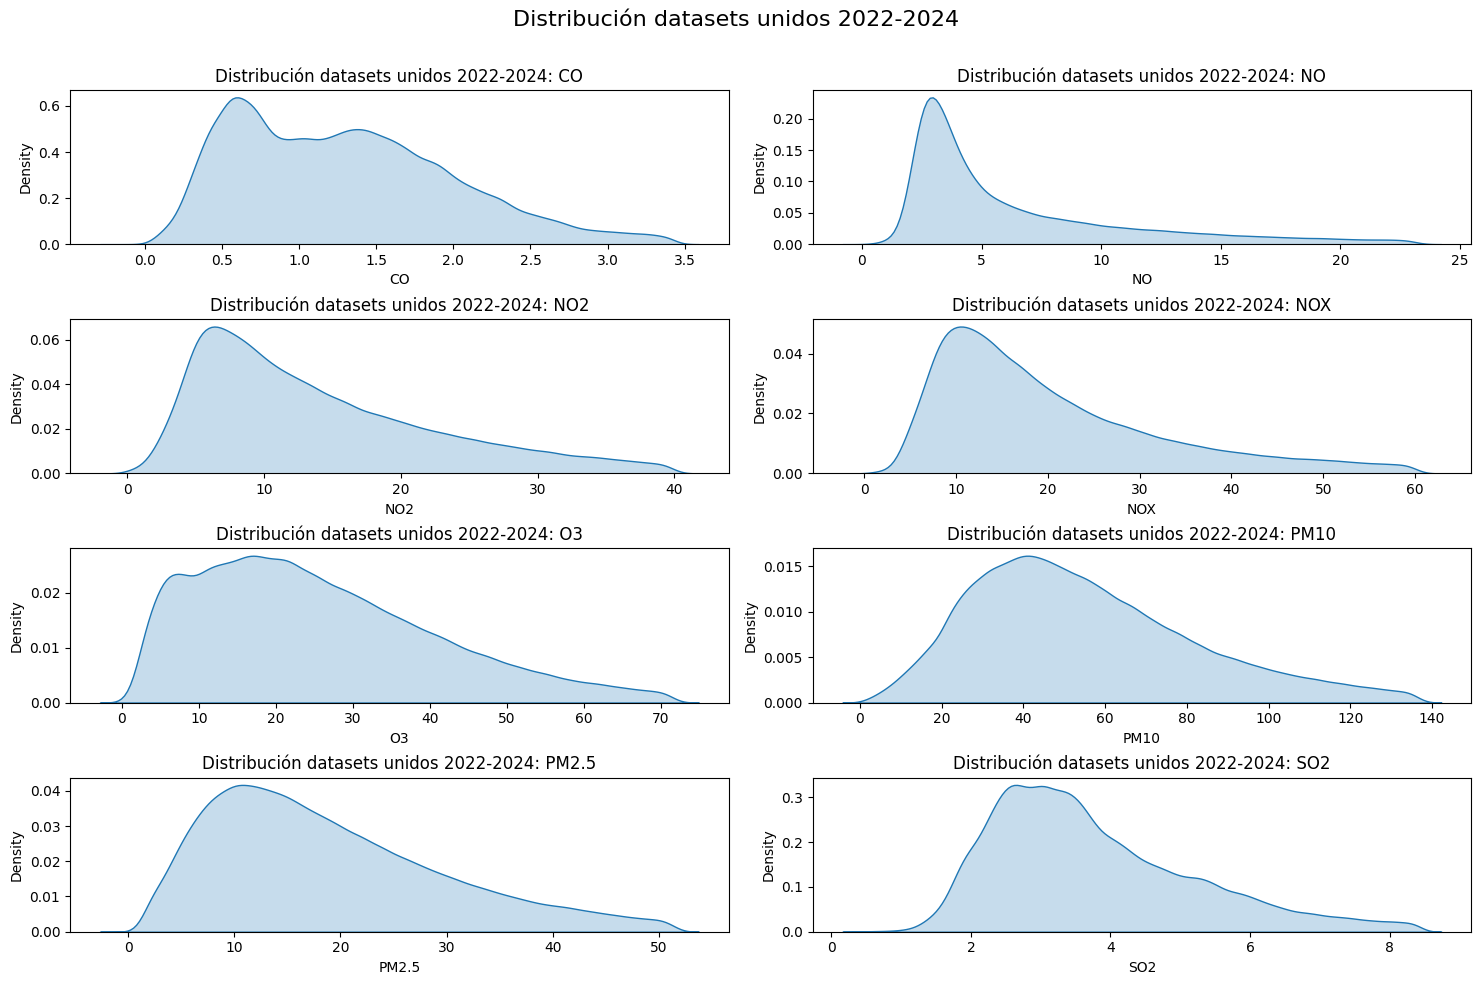

In [ ]:
# Graficar la distribución estandarizada
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_standardize, 1):
    plt.subplot(4, 2, i)  # Cambié a 4 filas y 2 columnas para adaptarse a 8 columnas
    sns.kdeplot(base_cocinada_2022_2024[column].dropna(), fill=True)  # Cambiado 'shade=True' por 'fill=True'
    plt.title(f"Distribución datasets unidos 2022-2024: {column}")

plt.tight_layout()
plt.suptitle("Distribución datasets unidos 2022-2024", fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

Dataset post-imputacion

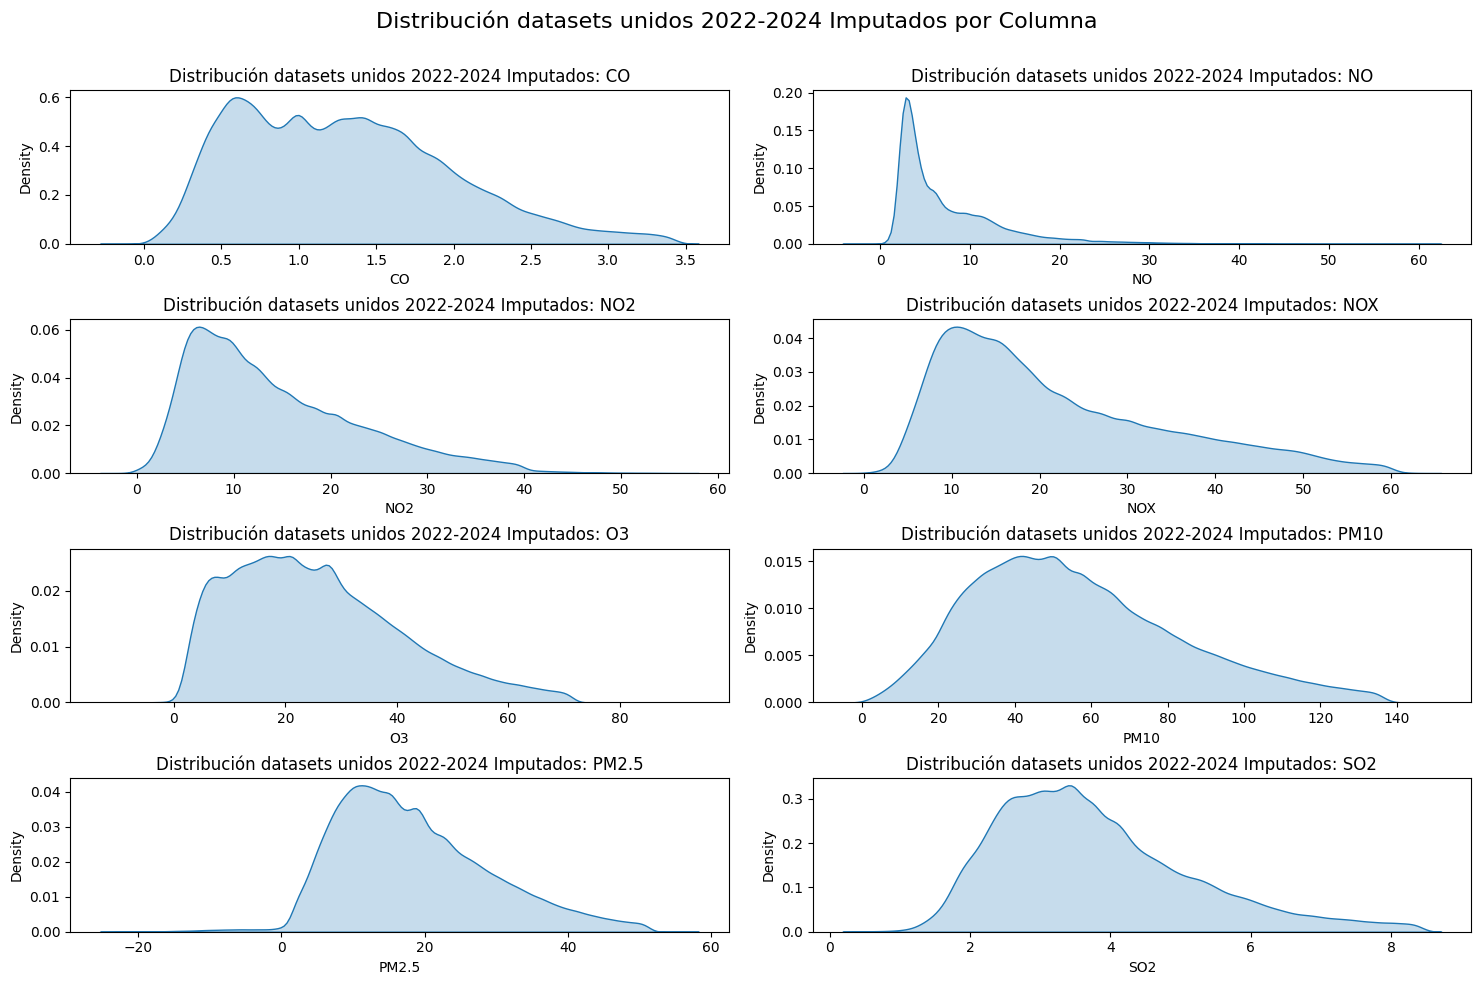

In [ ]:
# Graficar la distribución estandarizada
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_standardize, 1):
    plt.subplot(4, 2, i)  # Cambié a 4 filas y 2 columnas para adaptarse a 8 columnas
    sns.kdeplot(df_Completo_Imputado_Todascolumnas_SinEstandarizar_2022_2024[column].dropna(), fill=True)  # Cambiado 'shade=True' por 'fill=True'
    plt.title(f"Distribución datasets unidos 2022-2024 Imputados: {column}")

plt.tight_layout()
plt.suptitle("Distribución datasets unidos 2022-2024 Imputados por Columna", fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

Dataset post-estandarizacion

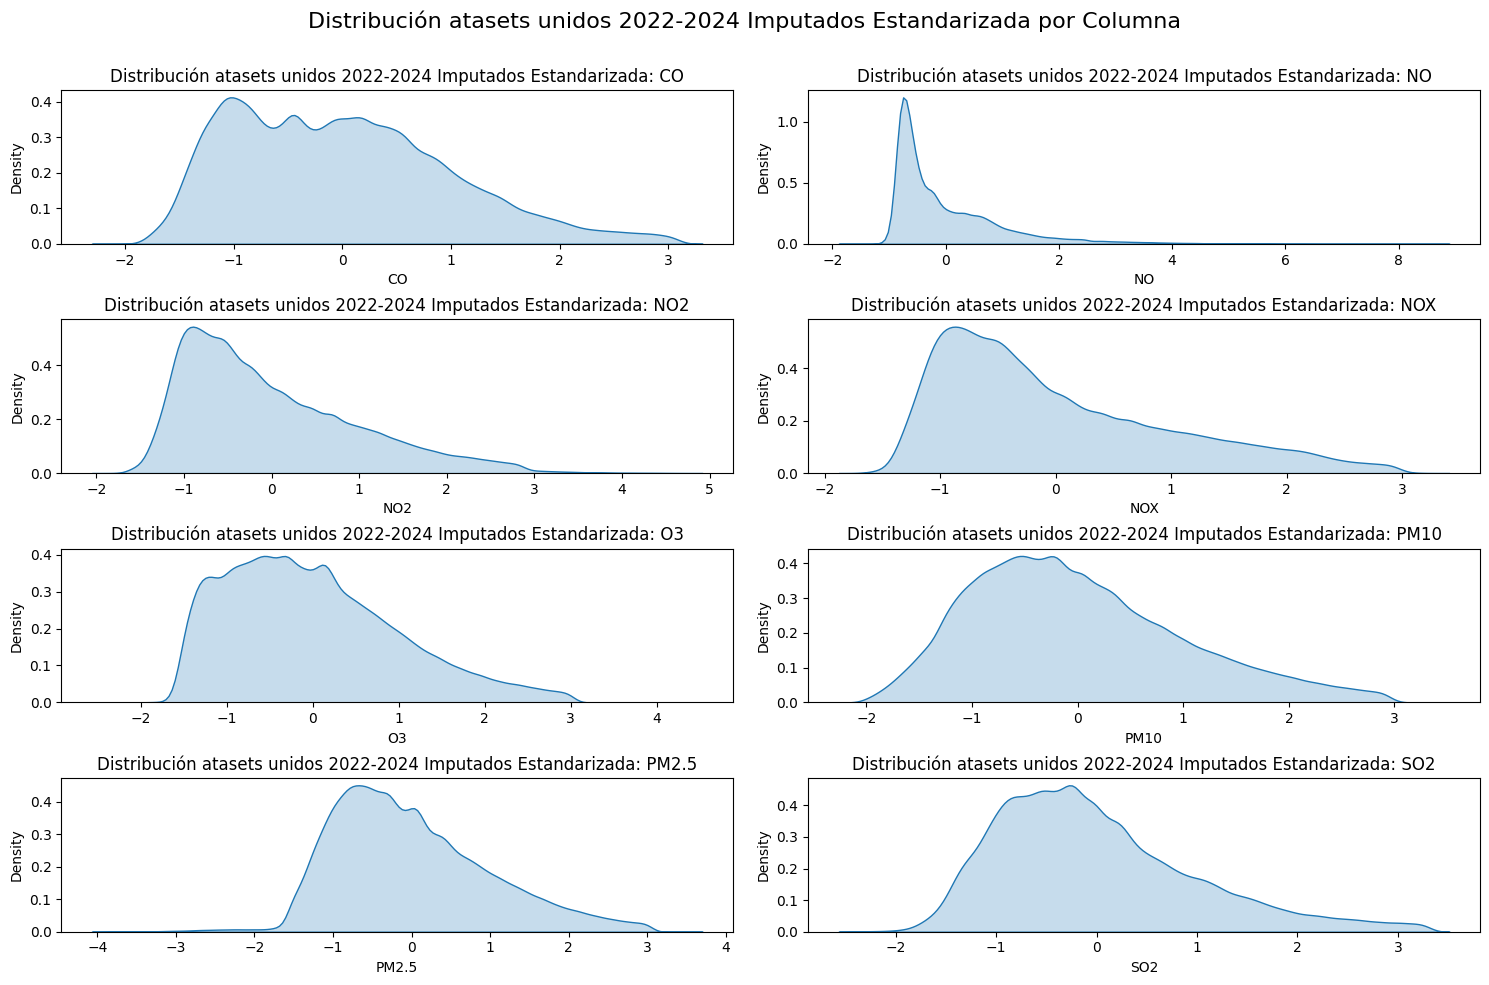

In [ ]:
# Graficar la distribución estandarizada
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_standardize, 1):
    plt.subplot(4, 2, i)  # Cambié a 4 filas y 2 columnas para adaptarse a 8 columnas
    sns.kdeplot(df_completo_estandarizado_2022_2024[column].dropna(), fill=True)  # Cambiado 'shade=True' por 'fill=True'
    plt.title(f"Distribución atasets unidos 2022-2024 Imputados Estandarizada: {column}")

plt.tight_layout()
plt.suptitle("Distribución atasets unidos 2022-2024 Imputados Estandarizada por Columna", fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

Efectividad imputacion

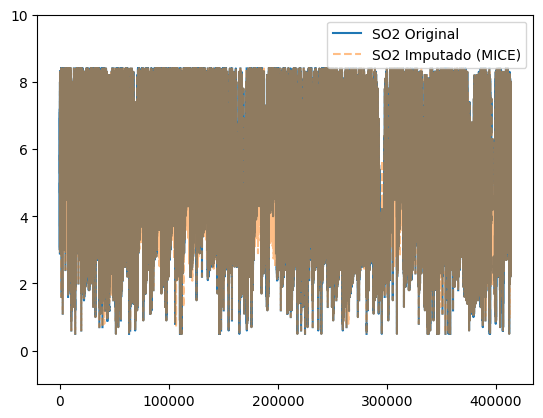

In [ ]:
# Graficar los resultados antes y después de la imputación para una columna, por ejemplo 'CO'
plt.plot(base_cruda_2022_2024['SO2'], label='SO2 Original')
plt.plot(df_Completo_Imputado_Todascolumnas_SinEstandarizar_2022_2024['SO2'], label='SO2 Imputado (MICE)', linestyle='--', alpha = 0.5)
plt.legend()
 # Rango para el eje X
plt.ylim([-1, 10])

plt.show()


In [ ]:
df_UBI

,Zona,Nombre_Estacion,Clave_Estacion,location
0,NORESTE3,Noreste3 Pesqueria,Pesqueria,"25.791343,-100.078176"
1,NORTE2,Norte2 Universidad,Universidad,"25.729787,-100.310028"
2,NOROESTE,Noroeste San Bernabé,San Bernabé,"25.75712,-100.365974"
3,NOROESTE2,Noroeste 2 Garcia,Garcia,"25.783331,-100.585833"
4,CENTRO,Centro Obispado,Obispado,"25.67602,-100.335847"
5,SURESTE3,Sureste3 Cadereyta,Cadereyta,"25.60087,-99.995334"
6,SUROESTE2,Suroeste2 San Pedro,San Pedro,"25.66528,-100.412778"
7,SUR,Sur,Preparatoria ITESM,"25.575383,-100.249371"
8,NORESTE,Noreste San Nicolas,San Nicolas,"25.74543,-100.255020"
9,NOROESTE3,Noroeste 3 Garcia,Mision San Juan,"25.785307, -100.463958"
